In [ ]:
from google.colab.patches import cv2_imshow


path = '/content/drive/MyDrive/Colab Notebooks/cells.jpg'

In [ ]:
path1 = '/content/drive/MyDrive/Colab Notebooks/Hela_hw2/train'
path2 = '/content/drive/MyDrive/Colab Notebooks/Hela_hw2/test'
path3 = '/content/drive/MyDrive/Colab Notebooks/Hela_hw2/validation'



In [ ]:
def glcm(image, delta_i, delta_j):
    levels = np.max(image) - np.min(image) + 1
    matrix = np.zeros((levels, levels)).astype(int)
    img_row, img_col = image.shape[0], image.shape[1]
    for i in range(img_row):
        for j in range(img_col):
                arr1 = image[i,j]
                if (j-delta_j)>=0:
                    arr3 = image[i,j-delta_j]
                    matrix[arr1, arr3] += 1
                if (j+delta_j)< img_col:
                    arr2 = image[i,j+delta_j]
                    matrix[arr1,arr2] += 1
    print(matrix)
    return matrix

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
from skimage.filters import sobel
from skimage.feature import greycomatrix, greycoprops
from skimage.measure import shannon_entropy

In [ ]:
#GLCM on the full image
train_images = []
train_labels = [] 
path1 = r'/content/drive/MyDrive/Colab Notebooks/Hela_hw2/train'
path1_E = r'/content/drive/MyDrive/Colab Notebooks/Hela_hw2/train/Endosome'
path1_G = r'/content/drive/MyDrive/Colab Notebooks/Hela_hw2/train/Golgi_gia'
path1_gg = r'/content/drive/MyDrive/Colab Notebooks/Hela_hw2/train/Golgi_gpp'
path2_m = r'/content/drive/MyDrive/Colab Notebooks/Hela_hw2/train/Microtubules'

pathy = '/content/drive/MyDrive/Colab Notebooks/Hela_hw2/train'
path2 = '/content/drive/MyDrive/Colab Notebooks/Hela_hw2/test'
path3 = '/content/drive/MyDrive/Colab Notebooks/Hela_hw2/validation'

paths = [path1, path1_E, path1_G,path1_gg, path2_m]


labels = os.listdir(paths[0])
labels.pop(0)
# print("labels:", labels)
trainE = os.listdir(paths[1])
# print("Train Data:", trainE)
trainG = os.listdir(paths[2])
trainGG = os.listdir(paths[3])
train_m = os.listdir(paths[4])


labels: ['Microtubules', 'Golgi_gpp', 'Endosome', 'Golgi_gia']
Train Data: ['r13feb98.tfr.03--1---2.dat.png', 'r06aug97.tfr.33--1---2.dat.png', 'r06aug97.tfr.22--1---2.dat.png', 'r06aug97.tfr.24--1---2.dat.png', 'r13feb98.tfr.01--1---2.dat.png', 'r06aug97.tfr.26--1---2.dat.png', 'r06aug97.tfr.27--1---2.dat.png', 'r13feb98.tfr.08--1---2.dat.png', 'r13feb98.tfr.05--1---2.dat.png', 'r13feb98.tfr.06--1---2.dat.png', 'r13feb98.tfr.07--1---2.dat.png', 'r13feb98.tfr.02--1---2.dat.png', 'r06aug97.tfr.29--1---2.dat.png', 'r06aug97.tfr.30--1---2.dat.png', 'r06aug97.tfr.25--1---2.dat.png', 'r06aug97.tfr.31--1---2.dat.png', 'r06aug97.tfr.23--1---2.dat.png', 'r06aug97.tfr.32--1---2.dat.png', 'r06aug97.tfr.28--1---2.dat.png', 'r13feb98.tfr.04--1---2.dat.png', 'r06aug97.tfr.34--1---2.dat.png', 'r06aug97.tfr.21--1---2.dat.png', 'r13feb98.tfr.09--1---2.dat.png', 'r13feb98.tfr.10--1---2.dat.png', 'r14jul98.tfr.14--1---2.dat.png', 'r14jul98.tfr.18--1---2.dat.png', 'r14jul98.tfr.22--1---2.dat.png', 'r14ju

In [ ]:
trainSet = {}
for image in trainE:
  path = path1_E + '/' + image
  trainSet[path] = 0

for image in trainG:
  path = path1_G + '/' + image
  trainSet[path] = 1

for image in trainGG:
  path = path1_gg + '/' + image
  trainSet[path] = 2

for image in train_m:
  path = path2_m + '/' + image
  trainSet[path] = 3

print("The training Dict:", trainSet)

The training Dict: {'/content/drive/MyDrive/Colab Notebooks/Hela_hw2/train/Endosome/r13feb98.tfr.03--1---2.dat.png': 0, '/content/drive/MyDrive/Colab Notebooks/Hela_hw2/train/Endosome/r06aug97.tfr.33--1---2.dat.png': 0, '/content/drive/MyDrive/Colab Notebooks/Hela_hw2/train/Endosome/r06aug97.tfr.22--1---2.dat.png': 0, '/content/drive/MyDrive/Colab Notebooks/Hela_hw2/train/Endosome/r06aug97.tfr.24--1---2.dat.png': 0, '/content/drive/MyDrive/Colab Notebooks/Hela_hw2/train/Endosome/r13feb98.tfr.01--1---2.dat.png': 0, '/content/drive/MyDrive/Colab Notebooks/Hela_hw2/train/Endosome/r06aug97.tfr.26--1---2.dat.png': 0, '/content/drive/MyDrive/Colab Notebooks/Hela_hw2/train/Endosome/r06aug97.tfr.27--1---2.dat.png': 0, '/content/drive/MyDrive/Colab Notebooks/Hela_hw2/train/Endosome/r13feb98.tfr.08--1---2.dat.png': 0, '/content/drive/MyDrive/Colab Notebooks/Hela_hw2/train/Endosome/r13feb98.tfr.05--1---2.dat.png': 0, '/content/drive/MyDrive/Colab Notebooks/Hela_hw2/train/Endosome/r13feb98.tfr.06-

In [ ]:
#for train
train_images = []
train_labels = [] 
#for directory_path in glob.glob("cell_images/train/*"):
for directory_path in glob.glob("/content/drive/MyDrive/Colab Notebooks/Hela_hw2/train/*"):
    label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, 0) #Reading color images
        train_images.append(img)
        train_labels.append(label)
        
train_images = np.array(train_images)
#print("train_images:", train_images)
train_labels = np.array(train_labels)
#print("train labels:", train_labels)

#for test
test_images = []
test_labels = [] 
#for directory_path in glob.glob("cell_images/train/*"):
for directory_path in glob.glob("/content/drive/MyDrive/Colab Notebooks/Hela_hw2/test/*"):
    label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, 0) #Reading color images
        test_images.append(img)
        test_labels.append(label)
        
test_images = np.array(test_images)
#print("train_images:", test_images)
test_labels = np.array(test_labels)
#print("train labels:", test_labels)

#for validation
val_images = []
val_labels = [] 
#for directory_path in glob.glob("cell_images/train/*"):
for directory_path in glob.glob("/content/drive/MyDrive/Colab Notebooks/Hela_hw2/validation/*"):
    label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, 0) #Reading color images
        val_images.append(img)
        val_labels.append(label)
        
val_images = np.array(val_images)
#print("train_images:", val_images)
val_labels = np.array(val_labels)
#print("train labels:", val_labels)



In [ ]:
from sklearn import preprocessing
encode = preprocessing.LabelEncoder()
encode.fit(test_labels)
test_labels_encoded = encode.transform(test_labels)
#print("Test labels:", test_labels_encoded)
encode.fit(train_labels)
train_labels_encoded = encode.transform(train_labels)
#print(train_labels_encoded)
encode.fit(val_labels)
val_labels_encoded = encode.transform(val_labels)
#print(val_labels_encoded)


In [ ]:
x_train, y_train, x_test, y_test, x_val, y_val = train_images, train_labels_encoded, test_images, test_labels_encoded,val_images, val_labels



In [ ]:
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0


In [ ]:
def getFeature(dataset):
    image_dataset = pd.DataFrame()
    for image in range(dataset.shape[0]):  #iterate through each file 
        #print(image)
        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        #Reset dataframe to blank after each loop.
        img = dataset[image, :,:]
        GLCM = greycomatrix(img.astype(np.uint8), [1], [0])   
        GLCM_Energy = greycoprops(GLCM, 'energy')[0]
        df['Energy'] = GLCM_Energy
        GLCM_contr = greycoprops(GLCM, 'contrast')[0]
        df['Contrast'] = GLCM_contr
        GLCM_corr = greycoprops(GLCM, 'correlation')[0]
        df['Corr'] = GLCM_corr             
        GLCM_hom = greycoprops(GLCM, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom       
  
        image_dataset = image_dataset.append(df)
    # print("image Dataset:", image_dataset)
        
    return image_dataset

getFeature(x_train)
getFeature(x_test)
getFeature(x_val)

,Energy,Contrast,Corr,Homogen
0,0.705809,4.392486,0.881414,0.836130
0,0.673726,26.856262,0.637888,0.731620
0,0.723317,91.165818,0.548916,0.772222
0,0.685720,4.425559,0.884411,0.820134
0,0.721521,11.709778,0.865399,0.784985
0,0.657157,12.429340,0.850545,0.744211
0,0.741070,3.729009,0.883144,0.862811
0,0.730360,13.373664,0.791092,0.789407
0,0.665302,37.677411,0.716077,0.721946
0,0.673037,7.882327,0.884681,0.793689


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
print("x_train shape:", x_train.shape, type(x_train))

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]*x_test.shape[2]))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1]*x_val.shape[2]))
knn = KNeighborsClassifier(n_neighbors = 4).fit(x_train, y_train)
knn1 = KNeighborsClassifier(n_neighbors = 4).fit(x_val, y_val)
#accuracy
accuracy = knn.score(x_test, y_test)
ac = knn1.score(x_val, y_val)
print("A1:", accuracy)# for test data
print("A2:", ac)# for validation data
  
# creating a confusion matrix
# knn_predictions = knn.predict(x_test) 

x_train shape: (274, 382, 512) <class 'numpy.ndarray'>
A1: 0.5961538461538461
A2: 0.55


In [ ]:
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(x_train, y_train)

x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1]*x_val.shape[2]))

svm_model_linear2 = SVC(kernel = 'linear', C = 1).fit(x_val, y_val)
svm_predictions = svm_model_linear.predict(x_test)
svm_predictions2 = svm_model_linear.predict(x_val)



# model accuracy for X_test  
accuracy1 = svm_model_linear2.score(x_val, y_val)
accuracy2 = svm_model_linear.score(x_test, y_test)
print("A1:", accuracy1)#for validation data
print("A2:", accuracy2)#for test data

A1: 1.0
A2: 0.9294871794871795


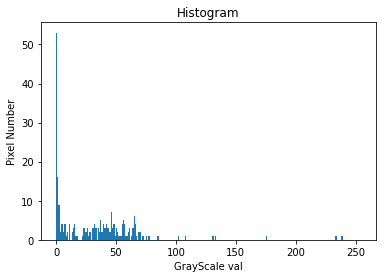

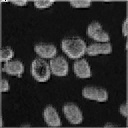

Histogram: [  27   11   15   16    9   11   11   14   28   23   37   85  131  234
  419  695 1077 1620 1815 1500  879  538  322  239  176  133  102   77
  108   72   65   64   66   42   53   45   37   46   39   37   42   41
   61   41   48   37   39   36   39   28   31   35   30   40   42   46
   46   51   47   32   43   43   43   58   47   44   50   32   38   39
   38   36   26   33   25   23   37   31   46   24   45   33   31   44
   55   57   61   46   47   49   59   50   48   61   65   57   66   55
   60   69   67   75   65   63   78   52   60   65   70   56   64   73
   66   69   56   56   57   66   48   56   50   65   70   57   65   46
   64   48   51   54   35   55   42   56   55   35   40   46   41   33
   40   25   30   32   26   32   24   15   30   26   14   22   14   23
   17   11    7   15   15   13    7    8   13    4    6    5    7    5
    2    6    4    5    9    7    4    2    2    3    5    4    3    0
    0    1    1    2    0    2    1    1    1    1    0    2    1 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:113: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


[[299544    588    525 ...      0      0      0]
 [   588     74     70 ...      0      0      0]
 [   525     70     80 ...      0      0      0]
 ...
 [     0      0      0 ...      0      0      0]
 [     0      0      0 ...      0      0      1]
 [     0      0      0 ...      0      1      0]]
Asm: 0.5887351350247021
Contrast: 62.90067724715907
Correlation: 0.9182686404137529
Sum Average: 15.326953617278503
Homogeneity: 0.7904976383481672
Entropy: 3.554396651933193
pass


<Figure size 432x288 with 0 Axes>

In [ ]:
import numpy
import os
import numpy as np
import cv2
import scipy
import math
import matplotlib.pyplot as plt
#rom google.colab.patches import cv2_imshow
from scipy.stats import kurtosis,skew


patha = '/content/drive/MyDrive/Colab Notebooks/cells.jpg'
pathb = '/content/drive/MyDrive/Colab Notebooks/actinfilament.png'
#Part1: histogram analysis

image1 = cv2.imread(patha, 0) #Read the input, "0" means as grayscale
image2 = cv2.imread(pathb, 0)
#part a
def histogram(image):
  histogram, bin_edges = np.histogram(image[:, :], bins=256, range=(0, 255))
  mean = np.mean(histogram)
  dev = np.std(histogram)
  skew = scipy.stats.skew(histogram)
  kur  = scipy.stats.kurtosis(histogram)
  entropy = scipy.stats.entropy(histogram)
  plt.figure()
  plt.xlabel("GrayScale val")
  plt.ylabel("Pixel Number")
  plt.title("Histogram")
  plt.hist(histogram, bin_edges[0:-1], rwidth=10)
  plt.show()
  threshold = 73
  binary = image>threshold
  plt.figure()
  cv2_imshow(image)
  print("Histogram:", histogram)
  print("Mean:", mean)
  print("Standard deviation:", dev) 
  print("Skew:", skew)
  print("Kurtosis:", kur)
  return mean, dev, skew, kur 

def asm(P):
  v1 = np.square(P)
  v2 = np.sum(v1)
  return v2

def contrast(P):
  val = 0
  for i in range(len(P)):
    for j in range(len(P[0])):
      v1 = P[i, j]
      v2 = (i-j)**2
      val += (v1*v2)
  return val

def correlation(P):
  result = 0
  levels = P.shape[0]

  miu_x = np.sum(np.sum(P, axis = 1) * np.arange(levels))
  miu_y = np.sum(np.sum(P, axis = 0) * np.arange(levels))

  std_x, std_y = 0, 0

  for i in range(levels):
    for j in range(levels):
      std_x += (i - miu_x) * (i - miu_x) * P[i][j]
      std_y += (j - miu_y) * (j - miu_y) * P[i][j]
  
  std_x, std_y = math.sqrt(std_x), math.sqrt(std_y)
  for i in range(levels):
    for j in range(levels):
      #result += ((i - miu_x) / std_x) * ((j - miu_y) / std_y) * P[i][j]
      result += P[i][j] * i * j

  result = (result - miu_x * miu_y) / (std_x * std_y)
  return result

def homogeneity(P):
  val = 0
  for i in range(len(P)):
    for j in range(len(P[0])):
      val += (1/(1+((i-j)**2)))*P[i, j]
  return val

    

def sum_average(P):
  res = 0
  row = len(P)
  col = len(P[0])
  for i in range(row):
    for j in range(col):
      res += (i+j)*P[i][j]
  return res

def entropy(P):
  res = 0
  for i in range(len(P)):
    for j in range(len(P[0])):
      if P[i, j] >0:
        v1 = np.log2(P[i, j])
        v2 = P[i, j]
        res +=(v1*v2)
  return res*-1


histogram(image1)
glcm(image2, 1, 1)


image = cv2.imread(pathb, 0).astype(np.int) #Read the input, "0" means as grayscale
q1result1 = glcm(image, 1, 1)
q2result1 = q1result1/np.sum(q1result1)

print("Asm:", asm(q2result1))
print("Contrast:", contrast(q2result1))
print("Correlation:", correlation(q2result1))
print("Sum Average:", sum_average(q2result1))
print("Homogeneity:", homogeneity(q2result1))
print("Entropy:", entropy(q2result1))
print("pass")


